# Globi database exploration:

### Author: Yikang Li  
### Date: Nov, 5th, 2018

In [15]:
import pandas as pd
import pytaxize
import re

#### Load the interaction data:

In [2]:
data =pd.read_csv('interactions.tsv', delimiter='\t', encoding='utf-8')

/Users/glance/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (7,8,9,10,11,12,13,14,15,16,27,30,31,32,33,34,35,36,37,40,41,43,44,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [422]:
len(data)

3419015

In [3]:
data.head()

,sourceTaxonId,sourceTaxonIds,sourceTaxonName,sourceTaxonRank,sourceTaxonPathNames,sourceTaxonPathIds,sourceTaxonPathRankNames,sourceId,sourceOccurrenceId,sourceCatalogNumber,...,localityName,eventDateUnixEpoch,referenceCitation,referenceDoi,referenceUrl,sourceCitation,sourceNamespace,sourceArchiveURI,sourceDOI,sourceLastSeenAtUnixEpoch
0,EOL:4472733,EOL:4472733 | EOL:4472733,Deinosuchus,genus,Deinosuchus,EOL:4472733,genus,NaN,NaN,NaN,...,NaN,NaN,"Rivera-Sylva H.E., E. Frey and J.R. Guzmán-Gui...",10.4267/2042/28152,NaN,Katja Schulz. 2015. Information about dinosaur...,KatjaSchulz/dinosaur-biotic-interactions,https://github.com/KatjaSchulz/dinosaur-biotic...,NaN,2018-10-22T22:55:39.871Z
1,EOL:4433651,EOL:4433651 | EOL:4433651,Daspletosaurus,genus,Daspletosaurus,EOL:4433651,genus,NaN,NaN,NaN,...,NaN,NaN,doi:10.1666/0022-3360(2001)075<0401:GCFACT>2.0...,10.1666/0022-3360(2001)075<0401:GCFACT>2.0.CO;2,NaN,Katja Schulz. 2015. Information about dinosaur...,KatjaSchulz/dinosaur-biotic-interactions,https://github.com/KatjaSchulz/dinosaur-biotic...,NaN,2018-10-22T22:55:39.871Z
2,EOL:24210058,EOL:24210058 | OTT:3617018 | GBIF:4975216 | EO...,Repenomamus robustus,species,Eucarya | Opisthokonta | Metazoa | Eumetazoa |...,EOL:5610326 | EOL:2910700 | EOL:42196910 | EOL...,| | subkingdom | | | | | | | | | supe...,NaN,NaN,NaN,...,NaN,NaN,doi:10.1038/nature03102,10.1038/nature03102,NaN,Katja Schulz. 2015. Information about dinosaur...,KatjaSchulz/dinosaur-biotic-interactions,https://github.com/KatjaSchulz/dinosaur-biotic...,NaN,2018-10-22T22:55:39.871Z
3,EOL:4433892,EOL:4433892 | EOL:4433892,Sinocalliopteryx gigas,species,Sinocalliopteryx gigas,EOL:4433892,species,NaN,NaN,NaN,...,NaN,NaN,doi:10.1371/journal.pone.0044012,10.1371/journal.pone.0044012,NaN,Katja Schulz. 2015. Information about dinosaur...,KatjaSchulz/dinosaur-biotic-interactions,https://github.com/KatjaSchulz/dinosaur-biotic...,NaN,2018-10-22T22:55:39.871Z
4,EOL:4433892,EOL:4433892 | EOL:4433892,Sinocalliopteryx gigas,species,Sinocalliopteryx gigas,EOL:4433892,species,NaN,NaN,NaN,...,NaN,NaN,doi:10.1371/journal.pone.0044012,10.1371/journal.pone.0044012,NaN,Katja Schulz. 2015. Information about dinosaur...,KatjaSchulz/dinosaur-biotic-interactions,https://github.com/KatjaSchulz/dinosaur-biotic...,NaN,2018-10-22T22:55:39.871Z


#### Variables in the database:   

In [345]:
data.columns

Index(['sourceTaxonId', 'sourceTaxonIds', 'sourceTaxonName', 'sourceTaxonRank',
       'sourceTaxonPathNames', 'sourceTaxonPathIds',
       'sourceTaxonPathRankNames', 'sourceId', 'sourceOccurrenceId',
       'sourceCatalogNumber', 'sourceBasisOfRecordId',
       'sourceBasisOfRecordName', 'sourceLifeStageId', 'sourceLifeStageName',
       'sourceBodyPartId', 'sourceBodyPartName', 'sourcePhysiologicalStateId',
       'sourcePhysiologicalStateName', 'interactionTypeName',
       'interactionTypeId', 'targetTaxonId', 'targetTaxonIds',
       'targetTaxonName', 'targetTaxonRank', 'targetTaxonPathNames',
       'targetTaxonPathIds', 'targetTaxonPathRankNames', 'targetId',
       'targetOccurrenceId', 'targetCatalogNumber', 'targetBasisOfRecordId',
       'targetBasisOfRecordName', 'targetLifeStageId', 'targetLifeStageName',
       'targetBodyPartId', 'targetBodyPartName', 'targetPhysiologicalStateId',
       'targetPhysiologicalStateName', 'decimalLatitude', 'decimalLongitude',
       'loc

#### How many types of animals? 

In [346]:
#source taxon
len(data['sourceTaxonId'].unique())

145264

In [347]:
#Target taxon
len(data['targetTaxonId'].unique())

104376

#### What are the interaction types?

In [348]:
data['interactionTypeName'].unique()

array(['eats', 'preysOn', 'interactsWith', 'pollinates', 'parasiteOf',
       'pathogenOf', 'visitsFlowersOf', 'adjacentTo', 'dispersalVectorOf',
       'endoparasitoidOf', 'symbiontOf', 'endoparasiteOf', 'hasVector',
       'ectoParasiteOf', 'vectorOf', 'livesOn', 'livesNear',
       'parasitoidOf', 'guestOf', 'livesInsideOf', 'farms',
       'ectoParasitoid', 'inhabits', 'kills', 'hasDispersalVector',
       'livesUnder', 'kleptoparasiteOf', 'hostOf', 'visits', 'hasHost',
       'eatenBy', 'preyedUponBy', 'flowersVisitedBy', 'hasParasite',
       'pollinatedBy', 'hasPathogen'], dtype=object)

In [349]:
#number of different types of interactions
len(data['interactionTypeName'].unique())

36

#### Let's look at certain taxon:

For example, here we are interested in the interactions involving 'Homo sapiens'

Take interactions involving 'Homo sapiens':

In [4]:
#Types of interactions involving Homo sapiens
data[data['sourceTaxonName'] == 'Homo sapiens']['interactionTypeName'].unique()

array(['interactsWith', 'eats', 'hostOf'], dtype=object)

In [423]:
len(data[data['sourceTaxonName'] == 'Homo sapiens'])

815

#### Let's focus on certain type of interaction involving Homo_sapiens, for example "eats":

In [5]:
hs_eats_data = data[(data['sourceTaxonName'] == 'Homo sapiens') & (data['interactionTypeName'] == 'eats')]

In [6]:
hs_eats_data.head()

,sourceTaxonId,sourceTaxonIds,sourceTaxonName,sourceTaxonRank,sourceTaxonPathNames,sourceTaxonPathIds,sourceTaxonPathRankNames,sourceId,sourceOccurrenceId,sourceCatalogNumber,...,localityName,eventDateUnixEpoch,referenceCitation,referenceDoi,referenceUrl,sourceCitation,sourceNamespace,sourceArchiveURI,sourceDOI,sourceLastSeenAtUnixEpoch
755562,EOL:327955,EOL:327955 | EOL:327955 | WD:Q15978631 | OTT:9...,Homo sapiens,species,Animalia | Chordata | Mammalia | Primates | Ho...,EOL:1 | EOL:694 | EOL:1642 | EOL:1645 | EOL:16...,kingdom | phylum | class | order | family | ge...,NaN,NaN,NaN,...,"Barro Colorado Island, Panama",NaN,"Worthington, A. 1989. Adaptations for avian fr...",10.1007/BF00379040.,NaN,F. Gabriel. Muñoz. 2017. Palm-Animal frugivore...,fgabriel1891/Plant-Frugivore-Interactions-Sout...,https://github.com/fgabriel1891/Plant-Frugivor...,NaN,2018-10-22T22:08:14.364Z
756855,EOL:327955,EOL:327955 | EOL:327955 | WD:Q15978631 | OTT:9...,Homo sapiens,species,Animalia | Chordata | Mammalia | Primates | Ho...,EOL:1 | EOL:694 | EOL:1642 | EOL:1645 | EOL:16...,kingdom | phylum | class | order | family | ge...,NaN,NaN,NaN,...,"Mizoram, India",NaN,"Hazarika, T.k. Lalramchuana. Nautiyal. B.P. 20...",10.1007/s10722-012-9799-5,NaN,F. Gabriel. Muñoz. 2017. Palm-Animal frugivore...,fgabriel1891/Plant-Frugivore-Interactions-Sout...,https://github.com/fgabriel1891/Plant-Frugivor...,NaN,2018-10-22T22:08:14.364Z
756856,EOL:327955,EOL:327955 | EOL:327955 | WD:Q15978631 | OTT:9...,Homo sapiens,species,Animalia | Chordata | Mammalia | Primates | Ho...,EOL:1 | EOL:694 | EOL:1642 | EOL:1645 | EOL:16...,kingdom | phylum | class | order | family | ge...,NaN,NaN,NaN,...,"Mizoram, India",NaN,"Hazarika, T.k. Lalramchuana. Nautiyal. B.P. 20...",10.1007/s10722-012-9799-5,NaN,F. Gabriel. Muñoz. 2017. Palm-Animal frugivore...,fgabriel1891/Plant-Frugivore-Interactions-Sout...,https://github.com/fgabriel1891/Plant-Frugivor...,NaN,2018-10-22T22:08:14.364Z
756857,EOL:327955,EOL:327955 | EOL:327955 | WD:Q15978631 | OTT:9...,Homo sapiens,species,Animalia | Chordata | Mammalia | Primates | Ho...,EOL:1 | EOL:694 | EOL:1642 | EOL:1645 | EOL:16...,kingdom | phylum | class | order | family | ge...,NaN,NaN,NaN,...,"Mizoram, India",NaN,"Hazarika, T.k. Lalramchuana. Nautiyal. B.P. 20...",10.1007/s10722-012-9799-5,NaN,F. Gabriel. Muñoz. 2017. Palm-Animal frugivore...,fgabriel1891/Plant-Frugivore-Interactions-Sout...,https://github.com/fgabriel1891/Plant-Frugivor...,NaN,2018-10-22T22:08:14.364Z
756858,EOL:327955,EOL:327955 | EOL:327955 | WD:Q15978631 | OTT:9...,Homo sapiens,species,Animalia | Chordata | Mammalia | Primates | Ho...,EOL:1 | EOL:694 | EOL:1642 | EOL:1645 | EOL:16...,kingdom | phylum | class | order | family | ge...,NaN,NaN,NaN,...,"Mizoram, India",NaN,"Hazarika, T.k. Lalramchuana. Nautiyal. B.P. 20...",10.1007/s10722-012-9799-5,NaN,F. Gabriel. Muñoz. 2017. Palm-Animal frugivore...,fgabriel1891/Plant-Frugivore-Interactions-Sout...,https://github.com/fgabriel1891/Plant-Frugivor...,NaN,2018-10-22T22:08:14.364Z


In [100]:
len(hs_eats_data)

509

In [101]:
target_hs_eats = hs_eats_data[['targetTaxonPathRankNames', 'targetTaxonPathNames']].dropna()
target_hs_eats.head()

,targetTaxonPathRankNames,targetTaxonPathNames
755562,kingdom | phylum | class | order | family | ge...,Plantae | Tracheophyta | Liliopsida | Arecales...
756856,kingdom | phylum | class | order | family | ge...,Plantae | Tracheophyta | Magnoliopsida | Myrta...
756857,kingdom | phylum | class | order | family,Plantae | Tracheophyta | Magnoliopsida | Erica...
756858,kingdom | phylum | class | order | family | ge...,Plantae | Tracheophyta | Magnoliopsida | Sapin...
756859,kingdom | phylum | class | order | family | ge...,Plantae | Tracheophyta | Liliopsida | Liliales...


In [102]:
len(target_hs_eats)

488

In [103]:
target_hs_eats['targetTaxonPathRankNames'] = target_hs_eats['targetTaxonPathRankNames'].str.replace(" ", "")
target_hs_eats['targetTaxonPathNames'] = target_hs_eats['targetTaxonPathNames'].str.replace(" ", "")

In [104]:
target_hs_eats['targetTaxonPathRankNames'] = target_hs_eats['targetTaxonPathRankNames'].str.split('|')
target_hs_eats['targetTaxonPathNames'] =  target_hs_eats['targetTaxonPathNames'].str.split('|')

In [105]:
target_hs_eats.head()

,targetTaxonPathRankNames,targetTaxonPathNames
755562,"[kingdom, phylum, class, order, family, genus,...","[Plantae, Tracheophyta, Liliopsida, Arecales, ..."
756856,"[kingdom, phylum, class, order, family, genus,...","[Plantae, Tracheophyta, Magnoliopsida, Myrtale..."
756857,"[kingdom, phylum, class, order, family]","[Plantae, Tracheophyta, Magnoliopsida, Ericale..."
756858,"[kingdom, phylum, class, order, family, genus,...","[Plantae, Tracheophyta, Magnoliopsida, Sapinda..."
756859,"[kingdom, phylum, class, order, family, genus,...","[Plantae, Tracheophyta, Liliopsida, Liliales, ..."


In [106]:
class_name = []
for i in range(len(target_hs_eats)):
    r = target_hs_eats.iloc[i]
    if re.search(r'\bclass\b', str(r['targetTaxonPathRankNames'])):
        ind = r['targetTaxonPathRankNames'].index('class')
        class_name.append(r['targetTaxonPathNames'][ind])
    elif re.search(r'\bsubclass\b', str(r['targetTaxonPathRankNames'])):
        ind = r['targetTaxonPathRankNames'].index('subclass')
        class_name.append(r['targetTaxonPathNames'][ind])
    elif re.search(r'\bsuperclass\b', str(r['targetTaxonPathRankNames'])):
        ind = r['targetTaxonPathRankNames'].index('superclass')
        class_name.append(r['targetTaxonPathNames'][ind])
    else:
        class_name.append('class not known')

In [107]:
len(class_name)

488

In [108]:
sum([i == 'class not known' for i in class_name])

4

There are 4 out of 488 target taxon that we don't know their class name.

In [109]:
target_hs_eats['class'] = class_name
target_hs_eats.head()

,targetTaxonPathRankNames,targetTaxonPathNames,class
755562,"[kingdom, phylum, class, order, family, genus,...","[Plantae, Tracheophyta, Liliopsida, Arecales, ...",Liliopsida
756856,"[kingdom, phylum, class, order, family, genus,...","[Plantae, Tracheophyta, Magnoliopsida, Myrtale...",Magnoliopsida
756857,"[kingdom, phylum, class, order, family]","[Plantae, Tracheophyta, Magnoliopsida, Ericale...",Magnoliopsida
756858,"[kingdom, phylum, class, order, family, genus,...","[Plantae, Tracheophyta, Magnoliopsida, Sapinda...",Magnoliopsida
756859,"[kingdom, phylum, class, order, family, genus,...","[Plantae, Tracheophyta, Liliopsida, Liliales, ...",Liliopsida


#### Let's look at the rows whose class is not known:

In [110]:
target_hs_eats[target_hs_eats['class'] == 'class not known']

,targetTaxonPathRankNames,targetTaxonPathNames,class
850656,"[kingdom, genus]","[Plantae, Fucus]",class not known
854719,"[kingdom, genus]","[Plantae, Fucus]",class not known
854753,"[kingdom, phylum]","[Animalia, Nemertea]",class not known
918181,"[, , , order, family, subfamily, genus, , spec...","[, , , Nidovirales, Coronaviridae, Coronavirin...",class not known


According to the table above, "class" is missing in the 'targetTaxonPathNames' for these target taxon.  
In order to get the class name of these rows, we need to do use "pytaxize" 

In [113]:
#First, we extract the bottom one from targetTaxonPathNames
no_class_taxon_names = [path[-1] for path 
                        in target_hs_eats[target_hs_eats['class'] == 'class not known']['targetTaxonPathNames']]
no_class_taxon_names

['Fucus', 'Fucus', 'Nemertea', 'Rabbit']

We will use 'pytaxize.gnr_resolve' here to resolve the scientific names:  
See an example below for 'Homo sapiens':  

In [124]:
pytaxize.gnr_resolve('Homo sapiens')

[[{'data_source_id': 4,
   'data_source_title': 'NCBI',
   'gni_uuid': '16f235a0-e4a3-529c-9b83-bd15fe722110',
   'name_string': 'Homo sapiens',
   'canonical_form': 'Homo sapiens',
   'classification_path': '|Eukaryota|Opisthokonta|Metazoa|Eumetazoa|Bilateria|Deuterostomia|Chordata|Craniata|Vertebrata|Gnathostomata|Teleostomi|Euteleostomi|Sarcopterygii|Dipnotetrapodomorpha|Tetrapoda|Amniota|Mammalia|Theria|Eutheria|Boreoeutheria|Euarchontoglires|Primates|Haplorrhini|Simiiformes|Catarrhini|Hominoidea|Hominidae|Homininae|Homo|Homo sapiens',
   'classification_path_ranks': '|superkingdom||kingdom||||phylum|subphylum|||||superclass||||class||||superorder|order|suborder|infraorder|parvorder|superfamily|family|subfamily|genus|species',
   'classification_path_ids': '131567|2759|33154|33208|6072|33213|33511|7711|89593|7742|7776|117570|117571|8287|1338369|32523|32524|40674|32525|9347|1437010|314146|9443|376913|314293|9526|314295|9604|207598|9605|9606',
   'taxon_id': '9606',
   'edit_distance

Since the output will be a list containing just one list, we index [0] to get rid of the outer list:

In [125]:
pytaxize.gnr_resolve('Homo sapiens')[0]

[{'data_source_id': 4,
  'data_source_title': 'NCBI',
  'gni_uuid': '16f235a0-e4a3-529c-9b83-bd15fe722110',
  'name_string': 'Homo sapiens',
  'canonical_form': 'Homo sapiens',
  'classification_path': '|Eukaryota|Opisthokonta|Metazoa|Eumetazoa|Bilateria|Deuterostomia|Chordata|Craniata|Vertebrata|Gnathostomata|Teleostomi|Euteleostomi|Sarcopterygii|Dipnotetrapodomorpha|Tetrapoda|Amniota|Mammalia|Theria|Eutheria|Boreoeutheria|Euarchontoglires|Primates|Haplorrhini|Simiiformes|Catarrhini|Hominoidea|Hominidae|Homininae|Homo|Homo sapiens',
  'classification_path_ranks': '|superkingdom||kingdom||||phylum|subphylum|||||superclass||||class||||superorder|order|suborder|infraorder|parvorder|superfamily|family|subfamily|genus|species',
  'classification_path_ids': '131567|2759|33154|33208|6072|33213|33511|7711|89593|7742|7776|117570|117571|8287|1338369|32523|32524|40674|32525|9347|1437010|314146|9443|376913|314293|9526|314295|9604|207598|9605|9606',
  'taxon_id': '9606',
  'edit_distance': 0,
  'i

Then we get a list of dictionaries for the scientific name, each dictionary comes from a different data source.  
Here I index [0] again to get the dictionary from the first data source:

In [126]:
pytaxize.gnr_resolve('Homo sapiens')[0][0]

{'data_source_id': 4,
 'data_source_title': 'NCBI',
 'gni_uuid': '16f235a0-e4a3-529c-9b83-bd15fe722110',
 'name_string': 'Homo sapiens',
 'canonical_form': 'Homo sapiens',
 'classification_path': '|Eukaryota|Opisthokonta|Metazoa|Eumetazoa|Bilateria|Deuterostomia|Chordata|Craniata|Vertebrata|Gnathostomata|Teleostomi|Euteleostomi|Sarcopterygii|Dipnotetrapodomorpha|Tetrapoda|Amniota|Mammalia|Theria|Eutheria|Boreoeutheria|Euarchontoglires|Primates|Haplorrhini|Simiiformes|Catarrhini|Hominoidea|Hominidae|Homininae|Homo|Homo sapiens',
 'classification_path_ranks': '|superkingdom||kingdom||||phylum|subphylum|||||superclass||||class||||superorder|order|suborder|infraorder|parvorder|superfamily|family|subfamily|genus|species',
 'classification_path_ids': '131567|2759|33154|33208|6072|33213|33511|7711|89593|7742|7776|117570|117571|8287|1338369|32523|32524|40674|32525|9347|1437010|314146|9443|376913|314293|9526|314295|9604|207598|9605|9606',
 'taxon_id': '9606',
 'edit_distance': 0,
 'imported_at'

Now we can extract certain ranks of the classification path of 'Homo sapiens'.

In [144]:
#Following the steps above, we now get the 'classification_path' for all scientific names whose 'class' is missing: 
classification_path = [pytaxize.gnr_resolve(name)[0][0]['classification_path'] for name in no_class_taxon_names]
classification_path

['Chromista|Ochrophyta|Phaeophyceae|Fucales|Fucaceae|Fucus',
 'Chromista|Ochrophyta|Phaeophyceae|Fucales|Fucaceae|Fucus',
 'Animalia|Nemertea',
 '|||Nidovirales|Coronaviridae|Coronavirinae|Betacoronavirus||Rabbit']

In [149]:
#get rid of spaces and split into list
classification_path = [i.replace(" ", "") for i in classification_path]
classification_path = [i.split('|') for i in classification_path]
classification_path

[['Chromista', 'Ochrophyta', 'Phaeophyceae', 'Fucales', 'Fucaceae', 'Fucus'],
 ['Chromista', 'Ochrophyta', 'Phaeophyceae', 'Fucales', 'Fucaceae', 'Fucus'],
 ['Animalia', 'Nemertea'],
 ['',
  '',
  '',
  'Nidovirales',
  'Coronaviridae',
  'Coronavirinae',
  'Betacoronavirus',
  '',
  'Rabbit']]

In [145]:
#get the 'classification_path_ranks' for all scientific names whose 'class' is missing:
classification_path_ranks = [pytaxize.gnr_resolve(name)[0][0]['classification_path_ranks'] for name in no_class_taxon_names]
classification_path_ranks

['kingdom|phylum|class|order|family|genus',
 'kingdom|phylum|class|order|family|genus',
 'kingdom|phylum',
 'superkingdom|||order|family|subfamily|genus||species']

In [146]:
#get rid of spaces and split into list:
classification_path_ranks = [i.replace(" ", "") for i in classification_path_ranks]
classification_path_ranks = [i.split('|') for i in classification_path_ranks]
classification_path_ranks

[['kingdom', 'phylum', 'class', 'order', 'family', 'genus'],
 ['kingdom', 'phylum', 'class', 'order', 'family', 'genus'],
 ['kingdom', 'phylum'],
 ['superkingdom',
  '',
  '',
  'order',
  'family',
  'subfamily',
  'genus',
  '',
  'species']]

In [150]:
#Same as what we did before to extract the 'class' from 'target_hs_eats'
find_class_name = []
for i in range(len(classification_path_ranks)):
    path_ranks = classification_path_ranks[i]
    path = classification_path[i]
    if re.search(r'\bclass\b', str(path_ranks)):
        ind = path_ranks.index('class')
        find_class_name.append(path[ind])
    elif re.search(r'\bsubclass\b', str(path_ranks)):
        ind = path_ranks.index('subclass')
        find_class_name.append(path[ind])
    elif re.search(r'\bsuperclass\b', str(path_ranks)):
        ind = path_ranks.index('superclass')
        find_class_name.append(path[ind])
    else:
        find_class_name.append('no_class_found')

In [151]:
find_class_name

['Phaeophyceae', 'Phaeophyceae', 'no_class_found', 'no_class_found']

There will still be some scientific names which do not have corresonding class name, here I just ignore them since they are only 2 out of 488

In [162]:
#Get the index of the 'class not known' rows in target_hs_eats:
index_class_not_known = target_hs_eats[target_hs_eats['class'] == 'class not known'].index
index_class_not_known

Int64Index([850656, 854719, 854753, 918181], dtype='int64')

In [166]:
#Replace 'class not known' in column 'class' with class names we newly found:
for i,j in zip(index_class_not_known, range(len(find_class_name))):
    target_hs_eats.loc[i,'class'] = find_class_name[j]

In [168]:
#Check if we replaced it correctly:
target_hs_eats.loc[index_class_not_known]

,targetTaxonPathRankNames,targetTaxonPathNames,class
850656,"[kingdom, genus]","[Plantae, Fucus]",Phaeophyceae
854719,"[kingdom, genus]","[Plantae, Fucus]",Phaeophyceae
854753,"[kingdom, phylum]","[Animalia, Nemertea]",no_class_found
918181,"[, , , order, family, subfamily, genus, , spec...","[, , , Nidovirales, Coronaviridae, Coronavirin...",no_class_found


### Success!

Now let's see what are the class that Homo sapiens most frequently eats:

In [169]:
target_hs_eats.groupby(target_hs_eats['class']).size().sort_values(ascending = False)

class
Mammalia           115
Actinopterygii     113
Aves                57
Magnoliopsida       52
Bivalvia            35
Gastropoda          17
Malacostraca        15
Liliopsida          11
Elasmobranchii       7
Anthozoa             6
Ascidiacea           6
Reptilia             5
Cephalopoda          5
Phaeophyceae         4
Maxillopoda          4
Echinoidea           4
Polyplacophora       4
Holothuroidea        3
Rosids               3
Insecta              3
Florideophyceae      2
Ulvophyceae          2
Gnathostomata        2
Dothideomycetes      2
Chrysophyceae        2
Bangiophyceae        2
Anopla               2
no_class_found       2
Chondrichthyes       1
Teleostei            1
Asterids             1
dtype: int64

In [290]:
top5_target_hs_eats  = target_hs_eats.groupby(target_hs_eats['class']).size().sort_values(ascending = False)[0:5]
top5_target_hs_eats

class
Mammalia          115
Actinopterygii    113
Aves               57
Magnoliopsida      52
Bivalvia           35
dtype: int64

In [291]:
list(top5_target_hs_eats.index)

['Mammalia', 'Actinopterygii', 'Aves', 'Magnoliopsida', 'Bivalvia']

Above all, out of all classes, the top five popular food for Homo sapiens are Mammalia, Actinopterygii, Aves, Magnoliopsida and Bivalvia      

### Plot what we found in directed graphs:

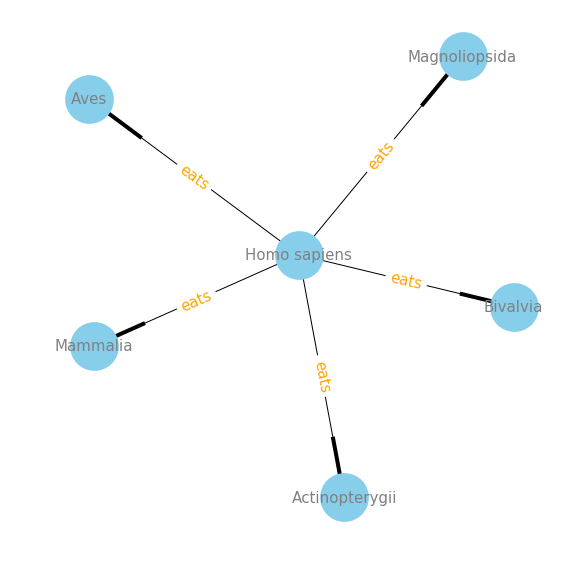

In [424]:
import networkx as nx
G = nx.DiGraph()

for name in (['Homo sapiens']+list(top5_target_hs_eats.index)):
    G.add_node(name)

for target in list(top5_target_hs_eats.index):
    G.add_edge('Homo sapiens', target, label = 'eats')


plt.figure(figsize=(8,8))
edge_labels = nx.get_edge_attributes(G,'label')

pos = nx.spring_layout(G) 
nx.draw_networkx_edge_labels(G,pos, edge_labels = edge_labels, font_size=15, font_color='orange')

nx.draw_networkx(G, pos, with_labels=True, node_size=1500, node_color="skyblue", alpha= 1, arrows=True, 
                    linewidths=10, font_color="grey", font_size=15)

plt.axis('off')
plt.tight_layout()
plt.show()

### What if we are interested in other interaction type or ranks?

Here I developed a function that helps us find top targets grouped in certain ranks for certain interaction types:

In [414]:
#getting top target taxons in certain ranks which interacts with Homo sapiens by certain interaction types:

def find_top_target(interactiontype, rank, head_n):
    
    hs_interaction_data = data[(data['sourceTaxonName'] == 'Homo sapiens') & (data['interactionTypeName'] == interactiontype)]
    target_hs_interact = hs_interaction_data[['targetTaxonPathRankNames', 'targetTaxonPathNames']].dropna()

    target_hs_interact['targetTaxonPathRankNames'] = target_hs_interact['targetTaxonPathRankNames'].str.replace(" ", "")
    target_hs_interact['targetTaxonPathNames'] = target_hs_interact['targetTaxonPathNames'].str.replace(" ", "")
    target_hs_interact['targetTaxonPathRankNames'] = target_hs_interact['targetTaxonPathRankNames'].str.split('|')
    target_hs_interact['targetTaxonPathNames'] =  target_hs_interact['targetTaxonPathNames'].str.split('|')

    rank_name = []
    for i in range(len(target_hs_interact)):
        r = target_hs_interact.iloc[i]
        if re.search(rank, str(r['targetTaxonPathRankNames'])):
            ind = r['targetTaxonPathRankNames'].index(rank)
            rank_name.append(r['targetTaxonPathNames'][ind])
        #elif re.search(r'\bsubclass\b', str(r['targetTaxonPathRankNames'])):
            #ind = r['targetTaxonPathRankNames'].index('subclass')
            #class_name.append(r['targetTaxonPathNames'][ind])
        #elif re.search(r'\bsuperclass\b', str(r['targetTaxonPathRankNames'])):
            #ind = r['targetTaxonPathRankNames'].index('superclass')
            #class_name.append(r['targetTaxonPathNames'][ind])
        else:
            rank_name.append('name not known')
        
    print('There are ' + str(sum([i == 'name not known' for i in rank_name])) + ' out of ' + str(len(rank_name)) + ' that we do not know their ' + str(rank) + ' name.')
    
    target_hs_interact[rank] = rank_name
    
    if sum([i == 'name not known' for i in rank_name]) > 0:
        no_rank_taxon_names = [path[-1] for path in target_hs_interact[target_hs_interact[rank] == 'name not known']['targetTaxonPathNames']]

        classification_path = [pytaxize.gnr_resolve(name)[0][0]['classification_path'] for name in no_rank_taxon_names]
        classification_path = [i.replace(" ", "") for i in classification_path]
        classification_path = [i.split('|') for i in classification_path]
        classification_path_ranks = [pytaxize.gnr_resolve(name)[0][0]['classification_path_ranks'] for name in no_rank_taxon_names]
        classification_path_ranks = [i.replace(" ", "") for i in classification_path_ranks]
        classification_path_ranks = [i.split('|') for i in classification_path_ranks]
        find_rank_name = []
        for i in range(len(classification_path_ranks)):
            path_ranks = classification_path_ranks[i]
            path = classification_path[i]
            if re.search(rank, str(path_ranks)):
                ind = path_ranks.index(rank)
                find_rank_name.append(path[ind])
            #elif re.search(r'\bsubclass\b', str(path_ranks)):
                #ind = path_ranks.index('subclass')
                #find_class_name.append(path[ind])
            #elif re.search(r'\bsuperclass\b', str(path_ranks)):
                #ind = path_ranks.index('superclass')
                #find_class_name.append(path[ind])
            else:
                find_rank_name.append('no_name_found')
        
        index_rank_not_known = target_hs_interact[target_hs_interact[rank] == 'name not known'].index
        for i,j in zip(index_rank_not_known, range(len(find_rank_name))):
            target_hs_interact.loc[i, rank] = find_rank_name[j]
    
    #drop missing ranks
    target_hs_interact = target_hs_interact[target_hs_interact[rank] != 'no_name_found']
    top_target_hs_interact  = target_hs_interact.groupby(target_hs_interact[rank]).size().sort_values(ascending = False)
    print('Top target '+ str(rank) + ' that Homo sapiens ' + str(interactiontype) +' :')
    return top_target_hs_interact.head(head_n)

For example, if we want to find top target orders that interact with Homo sapiens by interaction type "hostOf":

In [415]:
find_top_target('hostOf', 'order', 5)

There are 4 out of 47 that we do not know their order name.
Top target order that Homo sapiens hostOf :


order
Diphyllobothriidea    19
Ixodida               12
Siphonaptera           6
Cyclophyllidea         2
Trombidiformes         1
dtype: int64

In [416]:
top_target_order_hs_hostOf = list(find_top_target('hostOf', 'order', 5).index)
top_target_order_hs_hostOf

There are 4 out of 47 that we do not know their order name.
Top target order that Homo sapiens hostOf :


['Diphyllobothriidea',
 'Ixodida',
 'Siphonaptera',
 'Cyclophyllidea',
 'Trombidiformes']

In [425]:
def plot(top_target_list, interaction_type):
    G = nx.DiGraph()

    for name in (['Homo sapiens']+ top_target_list):
        G.add_node(name)

    for target in top_target_list:
        G.add_edge('Homo sapiens', target, label = interaction_type)

    plt.figure(figsize=(8,8))
    edge_labels = nx.get_edge_attributes(G,'label')

    pos = nx.spring_layout(G) 
    nx.draw_networkx_edge_labels(G,pos, edge_labels = edge_labels, font_size=15, font_color='orange')

    nx.draw_networkx(G, pos, with_labels=True, node_size=1500, node_color="skyblue", alpha= 1, arrows=True, 
                    linewidths=10, font_color="grey", font_size=15)

    plt.axis('off')
    plt.tight_layout()
    plt.show()

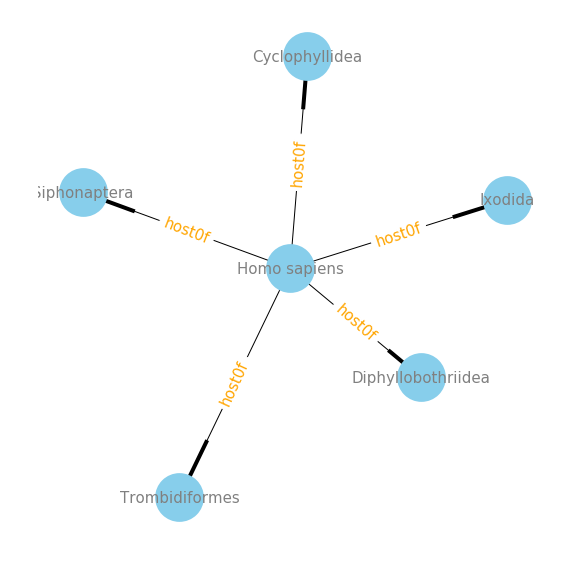

In [426]:
plot(top_target_order_hs_hostOf, 'host0f')

### We can also combine dufferent interaction types into one table and make durected graphs: 

In [427]:
d = {'eats': list(top5_target_hs_eats.index),
     'hostOf': top_target_order_hs_hostOf}
df = pd.DataFrame(d)
df

,eats,hostOf
0,Mammalia,Diphyllobothriidea
1,Actinopterygii,Ixodida
2,Aves,Siphonaptera
3,Magnoliopsida,Cyclophyllidea
4,Bivalvia,Trombidiformes


### Plot:

In [428]:
# Define a function for plotting more than one type of interactions for specific source taxon:

def plot(interaction_table, source_taxon):
    G = nx.DiGraph()

    G.add_node(source_taxon)
    for c in interaction_table.columns:
        for i in list(df[c]):
            G.add_node(i)
                       
    for c in interaction_table.columns:
        for i in list(df[c]):
            G.add_edge(source_taxon, i, label = c)

    plt.figure(figsize=(10,10))
    edge_labels = nx.get_edge_attributes(G,'label')

    pos = nx.spring_layout(G) 
    nx.draw_networkx_edge_labels(G,pos, edge_labels = edge_labels, font_size=15, font_color='orange')

    nx.draw_networkx(G, pos, with_labels=True, node_size=1500, node_color="skyblue", alpha= 1, arrows=True, 
                    linewidths=10, font_color="grey", font_size=15)

    plt.axis('off')
    plt.tight_layout()
    plt.show()

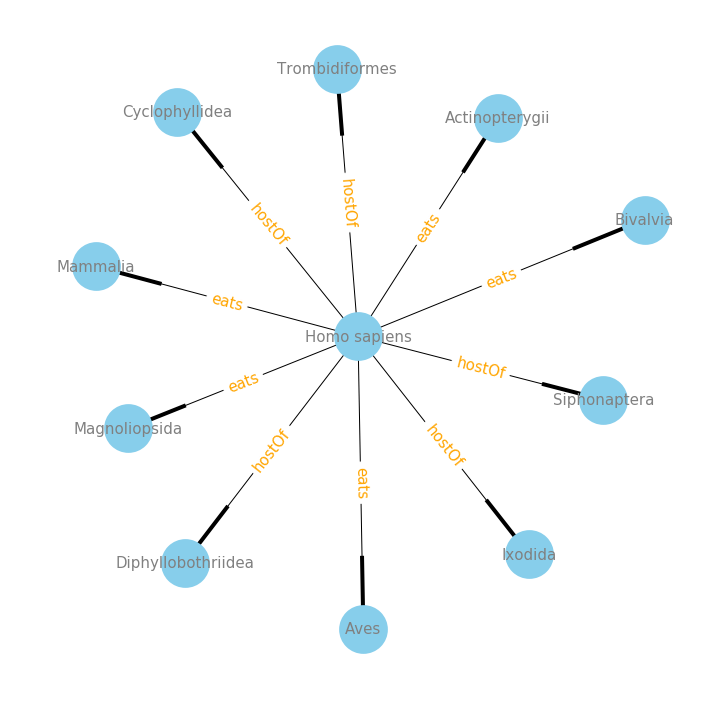

In [429]:
plot(df, 'Homo sapiens')